In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [47]:
df=pd.read_csv('/content/breast_cancer.csv')

In [48]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [50]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [51]:
df.shape

(683, 10)

In [52]:
df.isnull().sum()

,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [53]:
print(df['Class'].value_counts())

Class
2    444
4    239
Name: count, dtype: int64


In [54]:
df['Class']=df['Class'].map({2:0,4:1})

In [55]:
#splitting into features and target
X=df.drop('Class',axis=1)
Y=df['Class']


In [56]:
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2,random_state=2)

In [57]:
print("Training set shape",X_train.shape,y_train.shape)
print("Testing  set shape",X_test.shape,y_test.shape)

Training set shape (546, 9) (546,)
Testing  set shape (137, 9) (137,)


In [58]:
#computes the mean and standard deviation of training data then scales it
#transform=applies the same scaling leaned from training data to the test data so no data leakge
#after scaling each feature will have mean=0 and sdt=1
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [59]:
model=LogisticRegression(random_state=2)
model.fit(X_train,y_train)

LogisticRegression(random_state=2)

In [60]:
y_pred = model.predict(X_test)


In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.948905109489051

Confusion Matrix:
 [[79  4]
 [ 3 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96        83
           1       0.93      0.94      0.94        54

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



In [62]:
cm = confusion_matrix(y_test, y_pred)


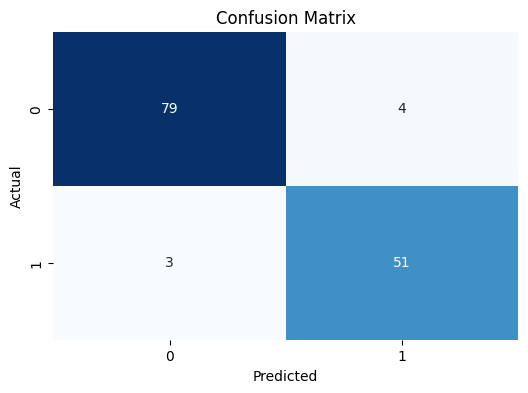

In [63]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [64]:
y_prob = model.predict_proba(X_test)[:, 1]


In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


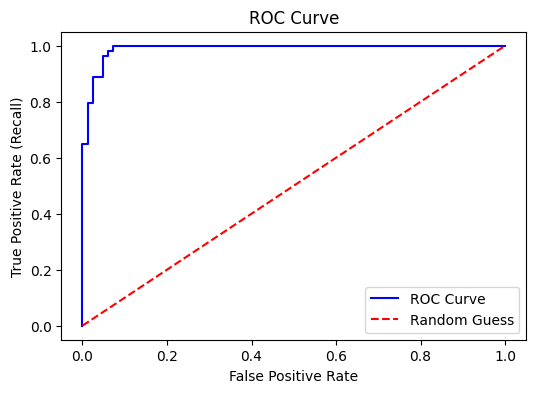

In [66]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label="ROC Curve")
plt.plot([0,1], [0,1], color='red', linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [67]:
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)


AUC Score: 0.9899598393574298
